In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import random
from sklearn.datasets import make_classification
import numpy as np

# Generate linear data
X, y = make_classification(
    n_samples=200,     # total samples
    n_features=2,      # only 2 features (for easy plotting)
    n_redundant=0,     # no redundant features
    n_informative=2,   # both features are informative
    n_clusters_per_class=1,
    class_sep=2.0,     # higher = easier separation
    random_state=42

)

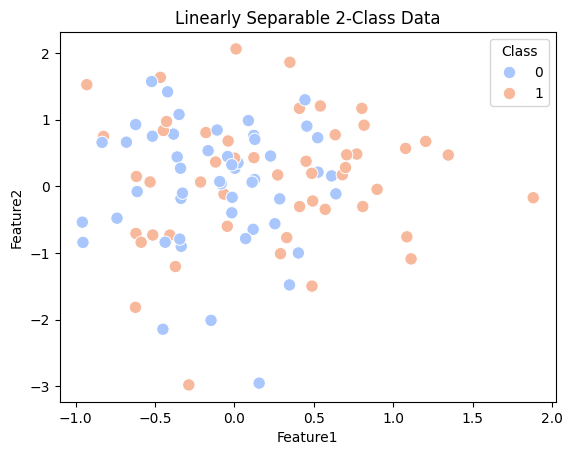

In [17]:
# Convert to DataFrame for visualization
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Class'] = y

# Plot
sns.scatterplot(x='Feature1', y='Feature2', hue='Class', data=df, palette='coolwarm', s=80)
plt.title("Linearly Separable 2-Class Data")
plt.show()

In [3]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]


In [11]:
import numpy as np

def perceptron(X, y, lr=0.1, n_iter=1000):
    """
    Simple Perceptron Algorithm for linearly separable data.

    Parameters:
    -----------
    X : numpy array or pandas DataFrame, shape (n_samples, n_features)
        Input features.
    y : numpy array or pandas Series, shape (n_samples,)
        Labels (+1 or -1).
    lr : float
        Learning rate.
    n_iter : int
        Number of iterations over the dataset.

    Returns:
    --------
    w : numpy array
        Learned weight vector.
    b : float
        Learned bias term.
    """

    # Convert to numpy arrays if input is pandas
    if not isinstance(X, np.ndarray):
        X = X.values
    if not isinstance(y, np.ndarray):
        y = y.values

    # Ensure labels are +1/-1
    y = np.where(y == 0, -1, y)

    n_features = X.shape[1]
    w = np.zeros(n_features)
    b = 0

    for _ in range(n_iter):
        for i in range(X.shape[0]):
            z = np.dot(w, X[i]) + b
            if y[i] * z <= 0:  # Misclassified
                w += lr * y[i] * X[i]
                b += lr * y[i]

    return w, b


In [12]:
w,b=perceptron(X,y)

In [13]:
m=-(w[0]/w[1])
b=-(b/w[1])

In [14]:
X_input=np.linspace(-3,3,100)
y_input=m*X_input+b

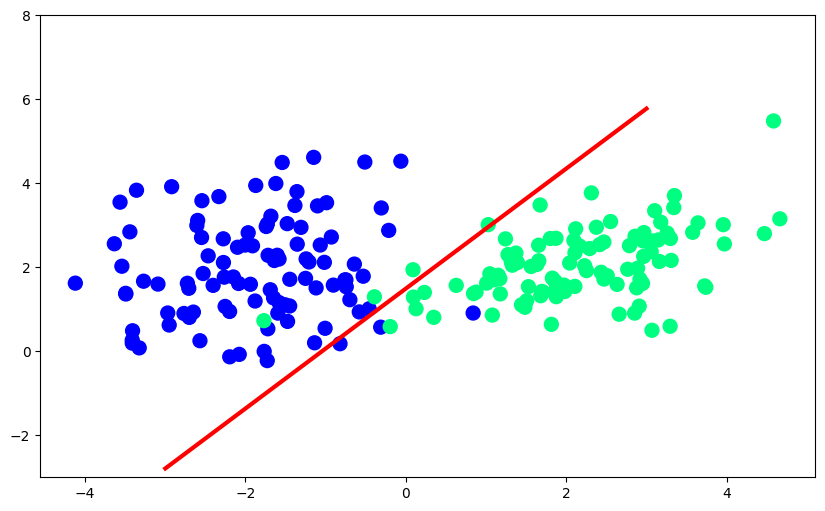

In [15]:
plt.figure(figsize=(10,6))
plt.plot(X_input, y_input, color='red', linewidth=3)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3,8)
plt.show()